In [1]:
import pandas as pd
df=pd.read_csv("dataset/education_zwe.csv")
df=pd.DataFrame(df)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country Name    12528 non-null  object
 1   Country ISO3    12528 non-null  object
 2   Year            12528 non-null  object
 3   Indicator Name  12528 non-null  object
 4   Indicator Code  12528 non-null  object
 5   Value           12528 non-null  object
dtypes: object(6)
memory usage: 587.4+ KB


In [2]:
#Select the target data based on a key word in the target's indicator name

df['Indicator Name'].astype('string')
filter_rate=df['Indicator Name'].str.contains('completion rate', case=False, na=False)
df_T=df[filter_rate]
df.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,Zimbabwe,ZWE,2010,Barro-Lee: Percentage of female population age...,BAR.NOED.1519.FE.ZS,0.1
2,Zimbabwe,ZWE,2005,Barro-Lee: Percentage of female population age...,BAR.NOED.1519.FE.ZS,0.1
3,Zimbabwe,ZWE,2000,Barro-Lee: Percentage of female population age...,BAR.NOED.1519.FE.ZS,1.2
4,Zimbabwe,ZWE,1995,Barro-Lee: Percentage of female population age...,BAR.NOED.1519.FE.ZS,0.09


In [15]:
#Apply the defined period of time to study, to the dataset

df_T['Year']=df_T.loc[2:,'Year'].astype('int')
df_T=df_T[df_T['Year']> 1990]
df_T['Year'].dtypes

dtype('int64')

In [16]:
#pivot the table so the indicators are columns and categories for study, ordered by year

df_t=df_T.pivot(index=['Year'],columns=['Indicator Name'], values='Value')
df_t=df_t.astype(float)
print(df_t.isna().sum())
df_t.head()

Indicator Name
Lower secondary completion rate, female (% of relevant age group)    4
Lower secondary completion rate, male (% of relevant age group)      4
Lower secondary completion rate, total (% of relevant age group)     4
Primary completion rate, female (% of relevant age group)            0
Primary completion rate, male (% of relevant age group)              0
Primary completion rate, total (% of relevant age group)             0
dtype: int64


Indicator Name,"Lower secondary completion rate, female (% of relevant age group)","Lower secondary completion rate, male (% of relevant age group)","Lower secondary completion rate, total (% of relevant age group)","Primary completion rate, female (% of relevant age group)","Primary completion rate, male (% of relevant age group)","Primary completion rate, total (% of relevant age group)"
Year,,,,,,
1999,NaN,NaN,NaN,90.836761,95.598930,93.225990
2001,NaN,NaN,NaN,90.257248,96.214706,93.233849
2002,NaN,NaN,NaN,85.991577,90.875961,88.424667
2003,NaN,NaN,NaN,85.454971,90.133301,87.781120
2012,70.39991,69.486023,69.945297,97.962959,96.212898,97.090309


In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

#scale and normalise data using MinMaxScaler
df_normalised = MinMaxScaler().fit_transform(df_t)
df_n=pd.DataFrame(df_normalised)
df_n.columns=df_t.columns
df_n.index=df_t.index

<AxesSubplot:xlabel='Year'>

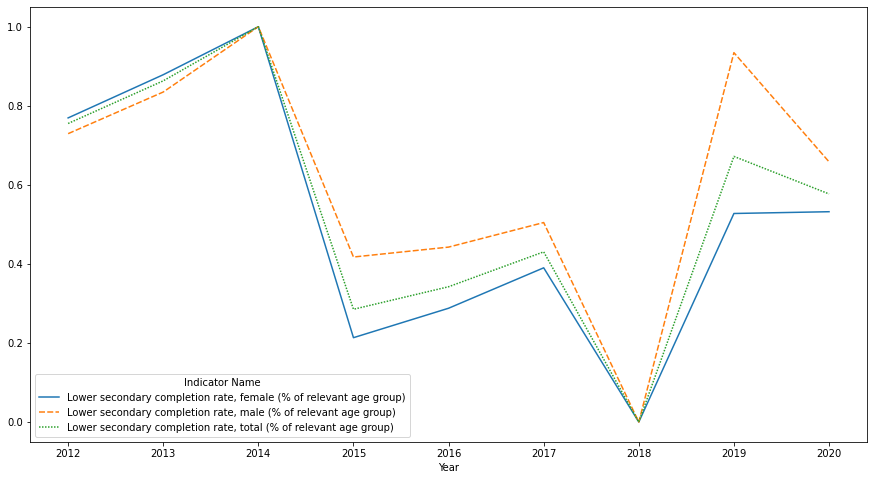

In [6]:
plt.figure(figsize = (15,8))
sns.lineplot(data=df_n.iloc[:,0:3], legend="brief")

<AxesSubplot:xlabel='Year'>

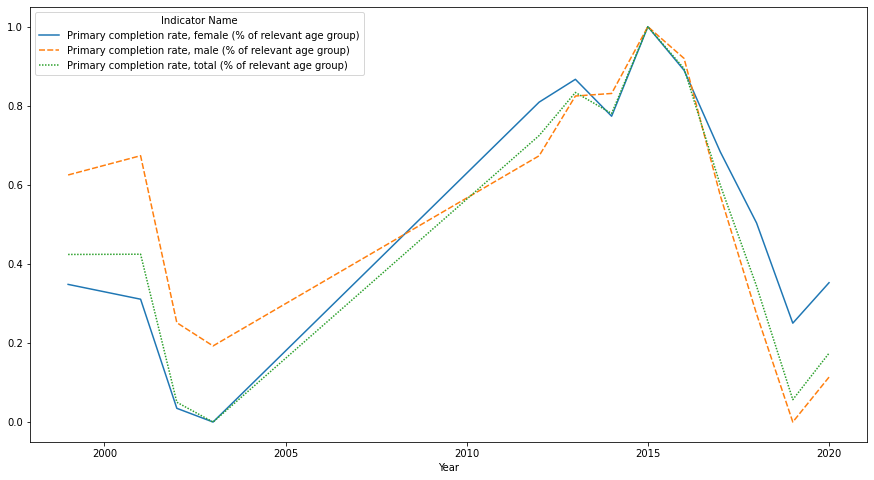

In [17]:
plt.figure(figsize = (15,8))
sns.lineplot(data=df_n.iloc[:,3:6], legend="brief")

In [7]:
#Apply regression method in order to impute NaN values

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
impute_it = IterativeImputer()
impute_it.fit_transform(df_n)
X1=impute_it.fit_transform(df_n)
df_i=pd.DataFrame(X1)
df_i.columns=df_t.columns
df_i.index=df_t.index
df_i.head()

Indicator Name,"Lower secondary completion rate, female (% of relevant age group)","Lower secondary completion rate, male (% of relevant age group)","Lower secondary completion rate, total (% of relevant age group)","Primary completion rate, female (% of relevant age group)","Primary completion rate, male (% of relevant age group)","Primary completion rate, total (% of relevant age group)"
Year,,,,,,
1999,0.511066,0.613546,0.547239,0.348164,0.624922,0.423867
2001,0.511122,0.613522,0.547227,0.310674,0.673641,0.424479
2002,0.510676,0.613503,0.547218,0.034715,0.251247,0.050098
2003,0.510611,0.613490,0.547212,0.000000,0.192488,0.000000
2012,0.769274,0.729400,0.755170,0.809179,0.673498,0.724692


<AxesSubplot:xlabel='Year'>

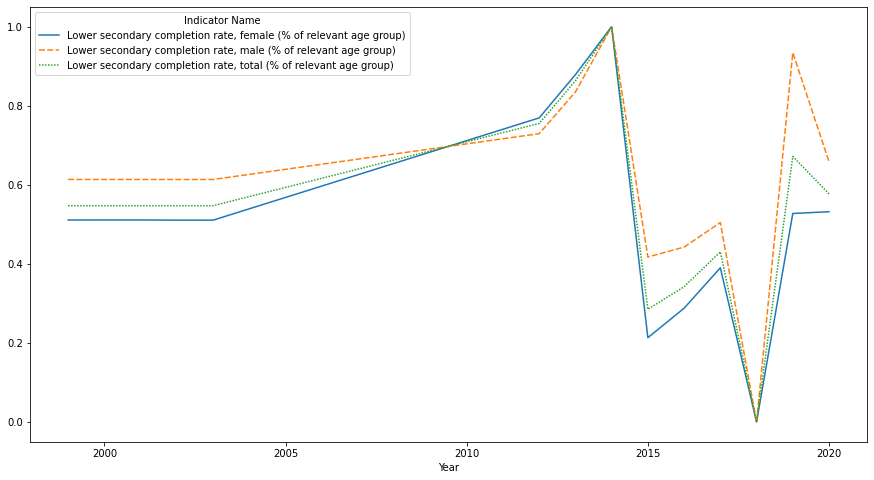

In [8]:
#graph using regression method for compariosn with KNN

plt.figure(figsize = (15,8))
sns.lineplot(data=df_i.iloc[:,0:3])

In [9]:
#Apply KNN method in order to impute NaN values

from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=2)
X2=impute_knn.fit_transform(df_n)
df_k=pd.DataFrame(X2)
df_k.columns=df_t.columns
df_k.index=df_t.index
df_k.head()

Indicator Name,"Lower secondary completion rate, female (% of relevant age group)","Lower secondary completion rate, male (% of relevant age group)","Lower secondary completion rate, total (% of relevant age group)","Primary completion rate, female (% of relevant age group)","Primary completion rate, male (% of relevant age group)","Primary completion rate, total (% of relevant age group)"
Year,,,,,,
1999,0.195042,0.252296,0.215226,0.348164,0.624922,0.423867
2001,0.195042,0.252296,0.215226,0.310674,0.673641,0.424479
2002,0.529741,0.796269,0.624419,0.034715,0.251247,0.050098
2003,0.529741,0.796269,0.624419,0.000000,0.192488,0.000000
2012,0.769274,0.729400,0.755170,0.809179,0.673498,0.724692


<AxesSubplot:xlabel='Year'>

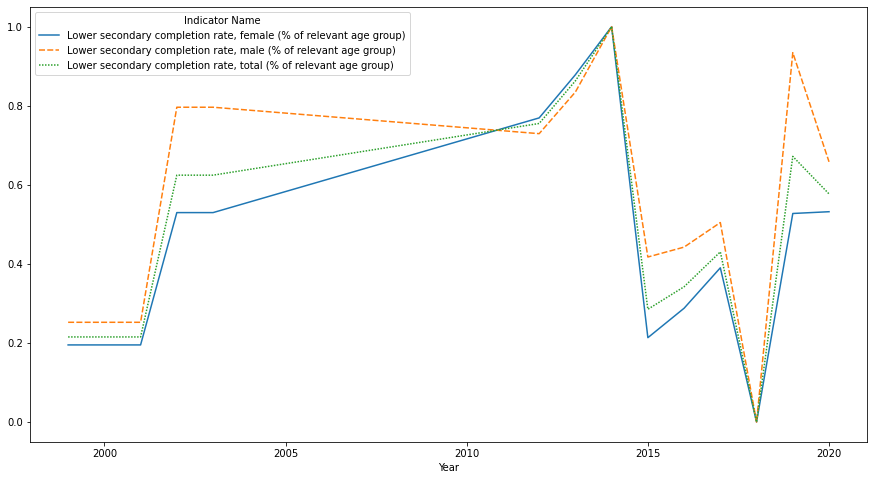

In [10]:
#graph using KNN method for compariosn with regression

plt.figure(figsize = (15,8))
sns.lineplot(data=df_k.iloc[:,0:3], legend="brief")

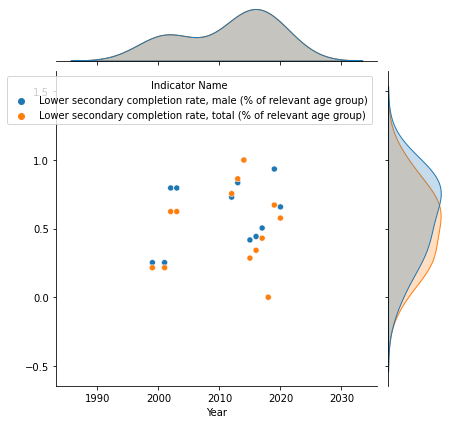

In [11]:

sns.jointplot(data=df_k.iloc[:,1:3], kind = 'scatter')

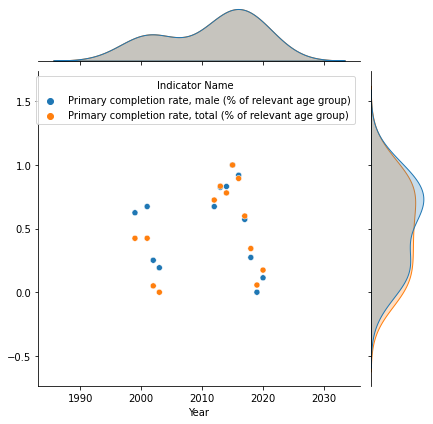

In [12]:

sns.jointplot(data=df_k.iloc[:,4:6], kind = 'scatter')

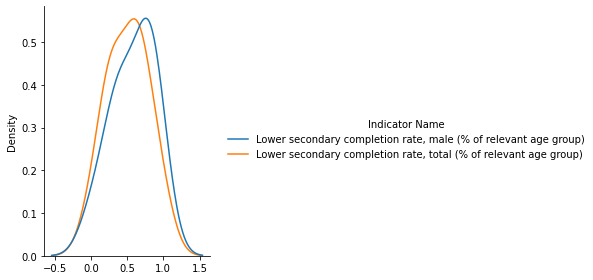

In [13]:

sns.displot(data=df_k.iloc[:,1:3], kind="kde", height=4,aspect=0.8)

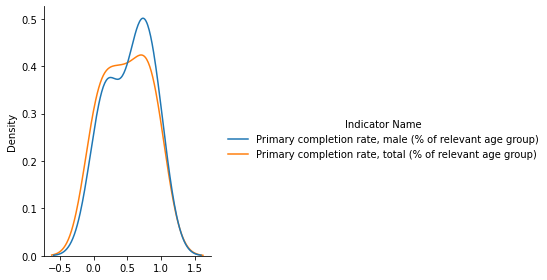

In [14]:

sns.displot(data=df_k.iloc[:,4:6], kind="kde", height=4,aspect=0.8)